In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

%precision 3

'%.3f'

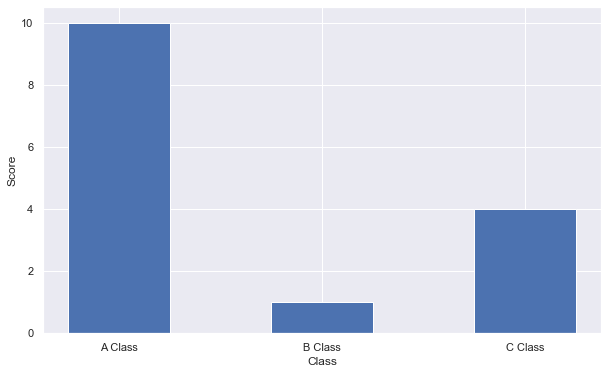

In [2]:
x = [1, 2, 3]
y = [10, 1, 4]

plt.figure(figsize=(10, 6))
plt.bar(x, y, align='center', width=0.5)
plt.xticks(x, ['A Class', 'B Class', 'C Class'])
plt.xlabel('Class')
plt.ylabel('Score')
plt.grid(True)

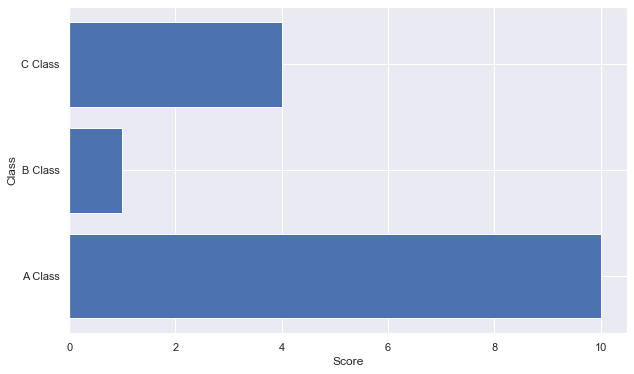

In [5]:
x = [1, 2, 3]
y = [10, 1, 4]

plt.figure(figsize=(10, 6))
plt.barh(x, y, align='center')
plt.yticks(x, ['A Class', 'B Class', 'C Class'])
plt.ylabel('Class')
plt.xlabel('Score')
plt.grid(True)

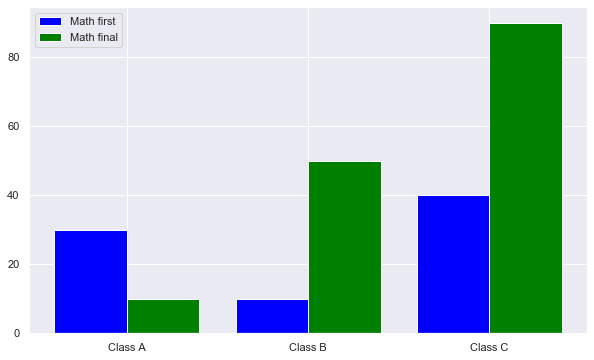

In [9]:
y1 = np.array([30, 10, 40])
y2 = np.array([10, 50, 90])

x = np.arange(len(y1))
w = 0.4

plt.figure(figsize=(10, 6))
plt.bar(x, y1, color='blue', width=w, label='Math first', align='center')
plt.bar(x + w, y2, color='green', width=w, label='Math final', align='center')
plt.legend(loc='best')
plt.xticks(x + w / 2, ['Class A', 'Class B', 'Class C'])
plt.grid(True)

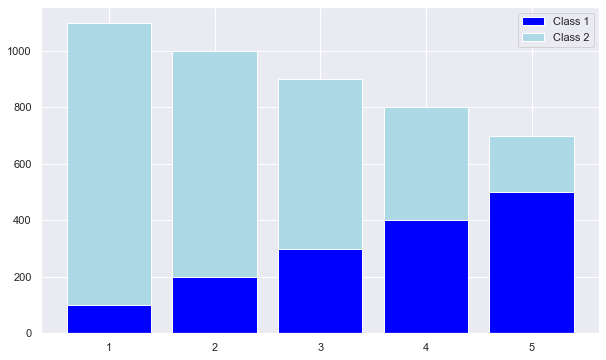

In [11]:
height1 = np.array([100, 200, 300, 400, 500])
height2 = np.array([1000, 800, 600, 400, 200])

x = np.array([1, 2, 3, 4, 5])

plt.figure(figsize=(10, 6))
p1 = plt.bar(x, height1, color='blue')
p2 = plt.bar(x, height2, bottom=height1, color='lightblue')
plt.legend((p1[0], p2[0]), ('Class 1', 'Class 2'))

In [12]:
type(p1)

matplotlib.container.BarContainer

In [13]:
p1.__dict__

{'patches': [<matplotlib.patches.Rectangle at 0x122cc7a20>,
 'errorbar': None,
 'eventson': False,
 '_oid': 0,
 '_propobservers': {},
 '_remove_method': <function list.remove(value, /)>,
 '_label': '_container0'}

In [14]:
type(p1[0])

matplotlib.patches.Rectangle

(-1.2142507666786346,
 1.134711077927507,
 -1.1258468317413044,
 1.101230806657754)

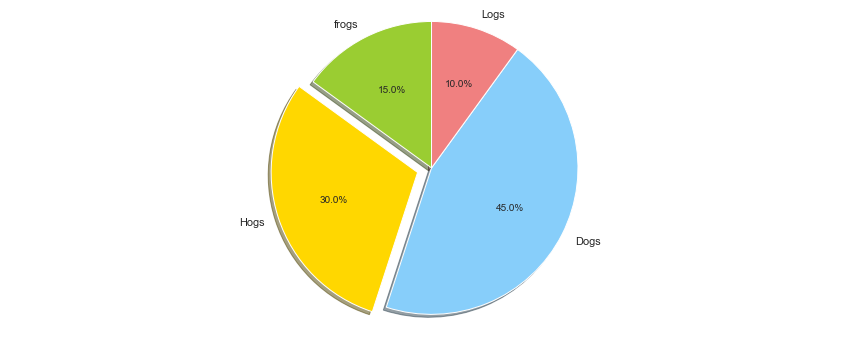

In [16]:
labels = ['frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)

plt.figure(figsize=(15, 6))

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

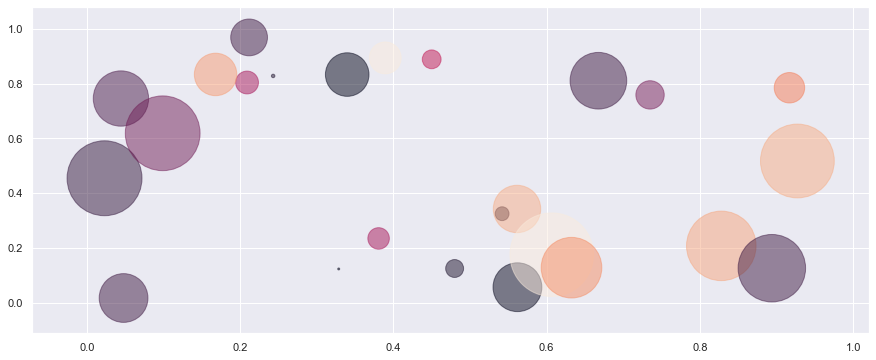

In [19]:
N = 25

x = np.random.rand(N)
y = np.random.rand(N)

colors = np.random.rand(N)

area = 10 * np.pi * (15 * np.random.rand(N)) ** 2

plt.figure(figsize=(15, 6))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.grid(True)

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64


(-1.1194019748591049,
 1.1107843646529993,
 -1.104313164149895,
 1.1002053981463242)

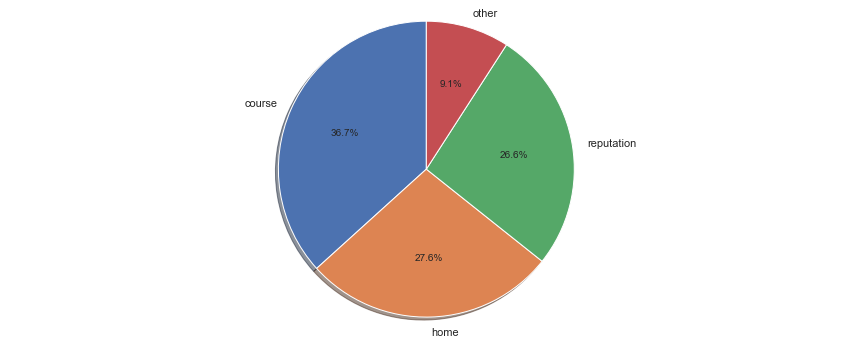

In [42]:
student_data_math = pd.read_csv('/Users/tsubasa/Jupyter/20190916_toudai/chap3/student-mat.csv', sep=';')
reason_data = student_data_math.reason.value_counts(ascending=False)
print(reason_data)

plt.figure(figsize=(15, 6))
plt.pie(reason_data.to_numpy() / reason_data.sum() * 100, labels=reason_data.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

In [37]:
reason_data

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

In [41]:
reason_data.to_numpy()

array([145, 109, 105,  36])

In [47]:
x = np.array([0, 1])
y = student_data_math.groupby('higher').G3.mean().sort_values(ascending=False)
y

higher
yes    10.608
no      6.800
Name: G3, dtype: float64

([<matplotlib.axis.XTick at 0x1063b06a0>,
 <a list of 2 Text xticklabel objects>)

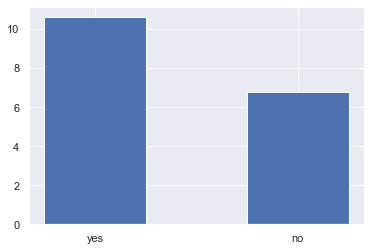

In [51]:
plt.bar(x, y, width=0.5)
plt.xticks(x, ('yes', 'no'))

In [52]:
y = student_data_math.groupby('traveltime').G3.mean()
y

traveltime
1    10.782101
2     9.906542
3     9.260870
4     8.750000
Name: G3, dtype: float64

([<matplotlib.axis.XTick at 0x122359cc0>,
 <a list of 4 Text xticklabel objects>)

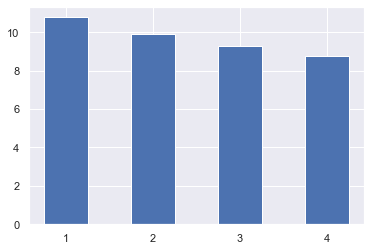

In [54]:
plt.bar(y.index, y, width=0.5)
plt.xticks(y.index)

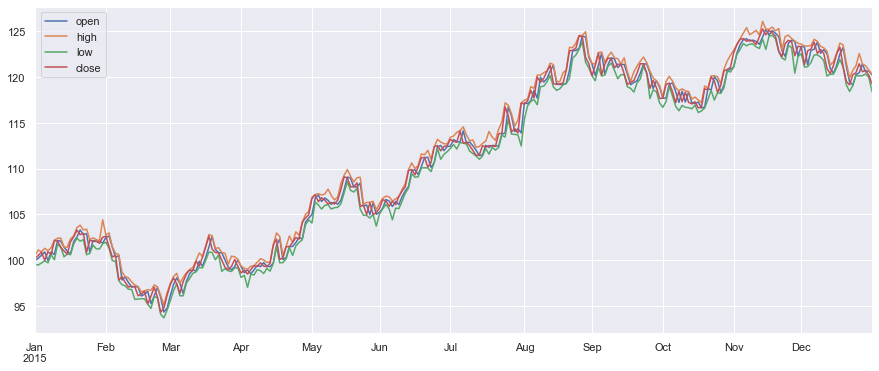

In [56]:
idx = pd.date_range('2015/01/01', '2015/12/31 23:59', freq='T')

dn = np.random.randint(2, size=len(idx)) * 2 - 1

rnd_walk = np.cumprod(np.exp(dn * 0.0002)) * 100

df = pd.Series(rnd_walk, index=idx).resample('B').ohlc()
df.plot(figsize=(15, 6), legend='best', grid=True)